In [25]:
import pandas as pd
import psycopg as pg
import matplotlib.pyplot as plt 
import numpy as np
import json
import matplotlib.pyplot as plt

engine = pg.connect("dbname='postgres' user='postgres' host='localhost' port='5432' password='1'")
df_pokemon = pd.read_sql('select * from pokedex_pokemon', con=engine)
df_trainer = pd.read_sql('select * from pokedex_trainer', con=engine)
df_energy = pd.read_sql('select * from pokedex_energy', con=engine)

/tmp/ipykernel_5251/1690050136.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pokemon = pd.read_sql('select * from pokedex_pokemon', con=engine)
/tmp/ipykernel_5251/1690050136.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trainer = pd.read_sql('select * from pokedex_trainer', con=engine)
/tmp/ipykernel_5251/1690050136.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_energy = pd.read_sql('select * from pokedex_energy', con=engine)


In [65]:
df_trainer

,id,name,rarity,image,prices,highest_market_price,card_id
0,1,Clefairy Doll,Rare,https://images.pokemontcg.io/base1/70_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,4.26,base1-70
1,2,Computer Search,Rare,https://images.pokemontcg.io/base1/71_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,2.59,base1-71
2,3,Devolution Spray,Rare,https://images.pokemontcg.io/base1/72_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,2.50,base1-72
3,4,Impostor Professor Oak,Rare,https://images.pokemontcg.io/base1/73_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,3.74,base1-73
4,5,Item Finder,Rare,https://images.pokemontcg.io/base1/74_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,6.32,base1-74
5,6,Lass,Rare,https://images.pokemontcg.io/base1/75_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,1.90,base1-75
6,7,Pokémon Breeder,Rare,https://images.pokemontcg.io/base1/76_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,4.86,base1-76
7,8,Pokémon Trader,Rare,https://images.pokemontcg.io/base1/77_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,4.03,base1-77
8,9,Scoop Up,Rare,https://images.pokemontcg.io/base1/78_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,5.85,base1-78
9,10,Super Energy Removal,Rare,https://images.pokemontcg.io/base1/79_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,2.49,base1-79


In [ ]:
# bar graph grouping by supertype and rarity of number of cards

# cat = [df_pokemon, df_trainer, df_energy]
# result = pd.concat(cat)

Pokemon = len(df_pokemon.index)
Trainer = len(df_trainer.index)
Energy = len(df_energy.index)

sizes = [Pokemon, Trainer, Energy]
names = ['pokemon','trainer', 'energy']
print(sizes)

plt.bar(names, sizes)
plt.title('Number of Pokemon Cards')
plt.xlabel('Type of Card')
plt.ylabel('Number of Cards')

# plt.show()

In [ ]:

# df_trainer.insert(1, "Rare Holo", [0], True)

pokemon_r = (df_pokemon.groupby('rarity').size())
trainer_r = (df_trainer.groupby('rarity').size())

trainer_r = trainer_r.reindex(pokemon_r.index, fill_value=0)
result = pokemon_r + trainer_r

print(result)
colors = ['#8c8c8c', '#5399cf', '#d9b92b', '#41a363']
rarities = ['Common', 'Rare', 'Rare Holo', 'Uncommon']
plt.bar(rarities, result, color=colors)
plt.title('Number of Cards in Each Rarity')
plt.xlabel('Rarities')
plt.ylabel('Number of Cards')

/tmp/ipykernel_5251/1243195076.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pokemon_types_link = pd.read_sql('select * from pokedex_pokemon_types', con=engine).set_index('pokemon_id').drop(['id'], axis=1)
/tmp/ipykernel_5251/1243195076.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_types = pd.read_sql('select * from pokedex_type', con=engine)


Text(0, 0.5, 'Number of Cards')

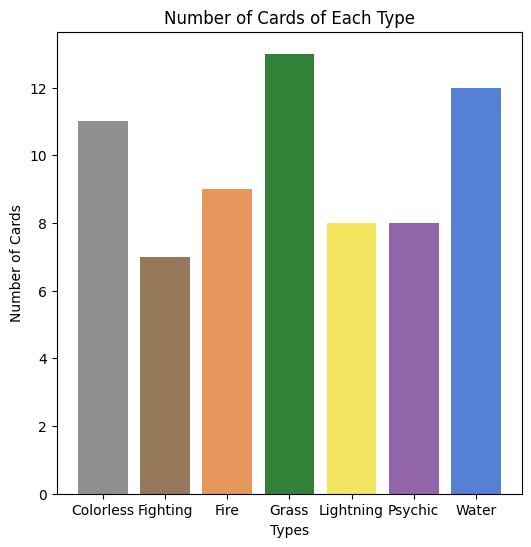

In [62]:
df_pokemon_types_link = pd.read_sql('select * from pokedex_pokemon_types', con=engine).set_index('pokemon_id').drop(['id'], axis=1)
df_types = pd.read_sql('select * from pokedex_type', con=engine)
df_pokemon_types = pd.merge(df_pokemon, df_pokemon_types_link, left_on='id', right_on='pokemon_id')
df_pokemon_types = pd.merge(df_pokemon_types, df_types, left_on='type_id', right_on='id', suffixes=[None, '_type']).drop(['id_type'], axis=1)
df_type_count = df_pokemon_types.groupby(['name_type'], as_index=False).count()
df_type_count
fig, ax = plt.subplots(figsize=(6, 6))
labels = df_type_count['name_type']
colors = ['#8f8f8f', '#96795a', '#e6975c', '#338039', '#f5e662', '#9265a8', '#5581d4']

plt.bar(labels, df_type_count['id'], color = colors)
plt.title('Number of Cards of Each Type')
plt.xlabel('Types')
plt.ylabel('Number of Cards')


In [ ]:
plt.title('Number of Cards of Each Type')
plt.xlabel('Types')
plt.ylabel('Number of Cards')

x = df_trainer.groupby('rarity').agg({'highest_market_price':'mean'}).sort_values(by='highest_market_price', ascending = False).plot.bar()

/tmp/ipykernel_5251/448812153.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pokemon_types_link = pd.read_sql('select * from pokedex_pokemon_types', con=engine).set_index('pokemon_id').drop(['id'], axis=1)
/tmp/ipykernel_5251/448812153.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_types = pd.read_sql('select * from pokedex_type', con=engine)


Text(0, 0.5, 'price')

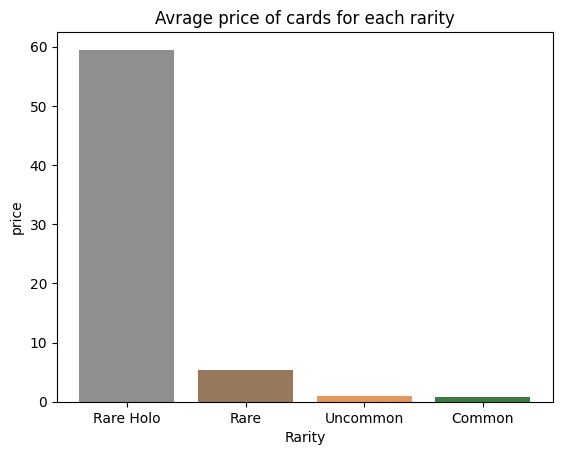

In [76]:
df_pokemon_types_link = pd.read_sql('select * from pokedex_pokemon_types', con=engine).set_index('pokemon_id').drop(['id'], axis=1)
df_types = pd.read_sql('select * from pokedex_type', con=engine)
df_pokemon_types = pd.merge(df_pokemon, df_pokemon_types_link, left_on='id', right_on='pokemon_id')
df_pokemon_types = pd.merge(df_pokemon_types, df_types, left_on='type_id', right_on='id', suffixes=[None, '_type']).drop(['id_type'], axis=1)
# df_type_count = df_pokemon_types.groupby(['rarity'], as_index=False).sum()
# df_type_count = df_pokemon_types.groupby('rarity').agg({'highest_market_price':'mean'}).sort_values(by='highest_market_price', ascending = False)
df_type_count = df_pokemon_types.groupby(['rarity'], as_index=False).agg({'highest_market_price':'mean'}).sort_values(by='highest_market_price', ascending = False)
df_type_count
# fig, ax = plt.subplots(figsize=(6, 6))
labels = df_type_count['rarity']
# colors = ['#8f8f8f', '#96795a', '#e6975c', '#338039', '#f5e662', '#9265a8', '#5581d4']

plt.bar(labels, df_type_count['highest_market_price'], color = colors)
plt.title('Avrage price of cards for each rarity')
plt.xlabel('Rarity')
plt.ylabel('price')
